In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
#import dataset
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


# Data Preprocessing Part 1

In [3]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

model           24
transmission     3
fuelType         5
dtype: int64

# Segment model attribute into smaller number of unique value

In [4]:
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [5]:
def segment_model(model):
    if model.strip() == 'Fiesta' or model.strip() == 'Focus':
        return 'Compact Cars'
    elif 'Kuga' in model or 'EcoSport' in model:
        return 'SUVs'
    elif 'Tourneo' in model or 'S-MAX' in model or 'B-MAX' in model:
        return 'Minivans'
    elif 'Galaxy' in model or 'Mustang' in model or 'Grand Tourneo Connect' in model:
        return 'Luxury Cars'
    elif 'Fusion' in model:
        return 'Mid-size Sedans'
    elif 'Ranger' in model:
        return 'Compact Pickup Trucks'
    else:
        return 'Other'

df['model'] = df['model'].apply(segment_model)

<AxesSubplot:>

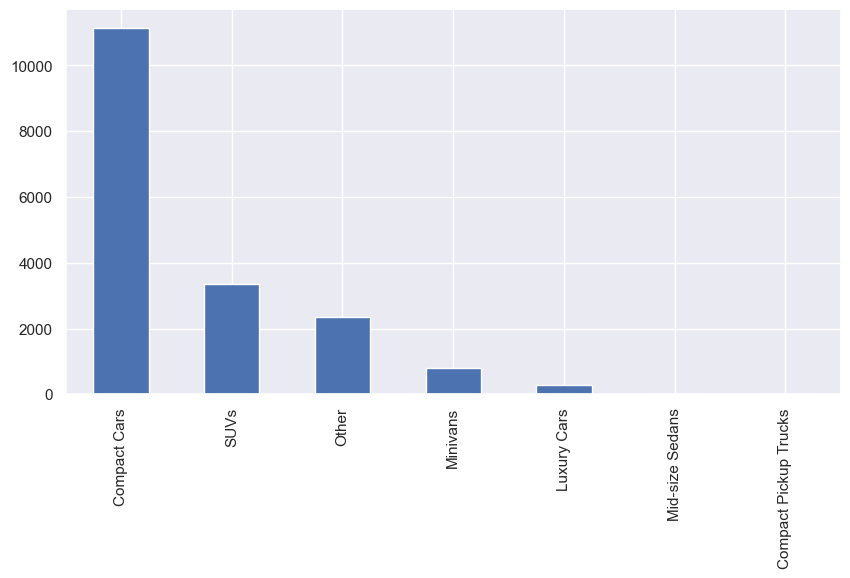

In [6]:
plt.figure(figsize=(10,5))
df['model'].value_counts().plot(kind='bar')

# Exxploratory Data Analysis

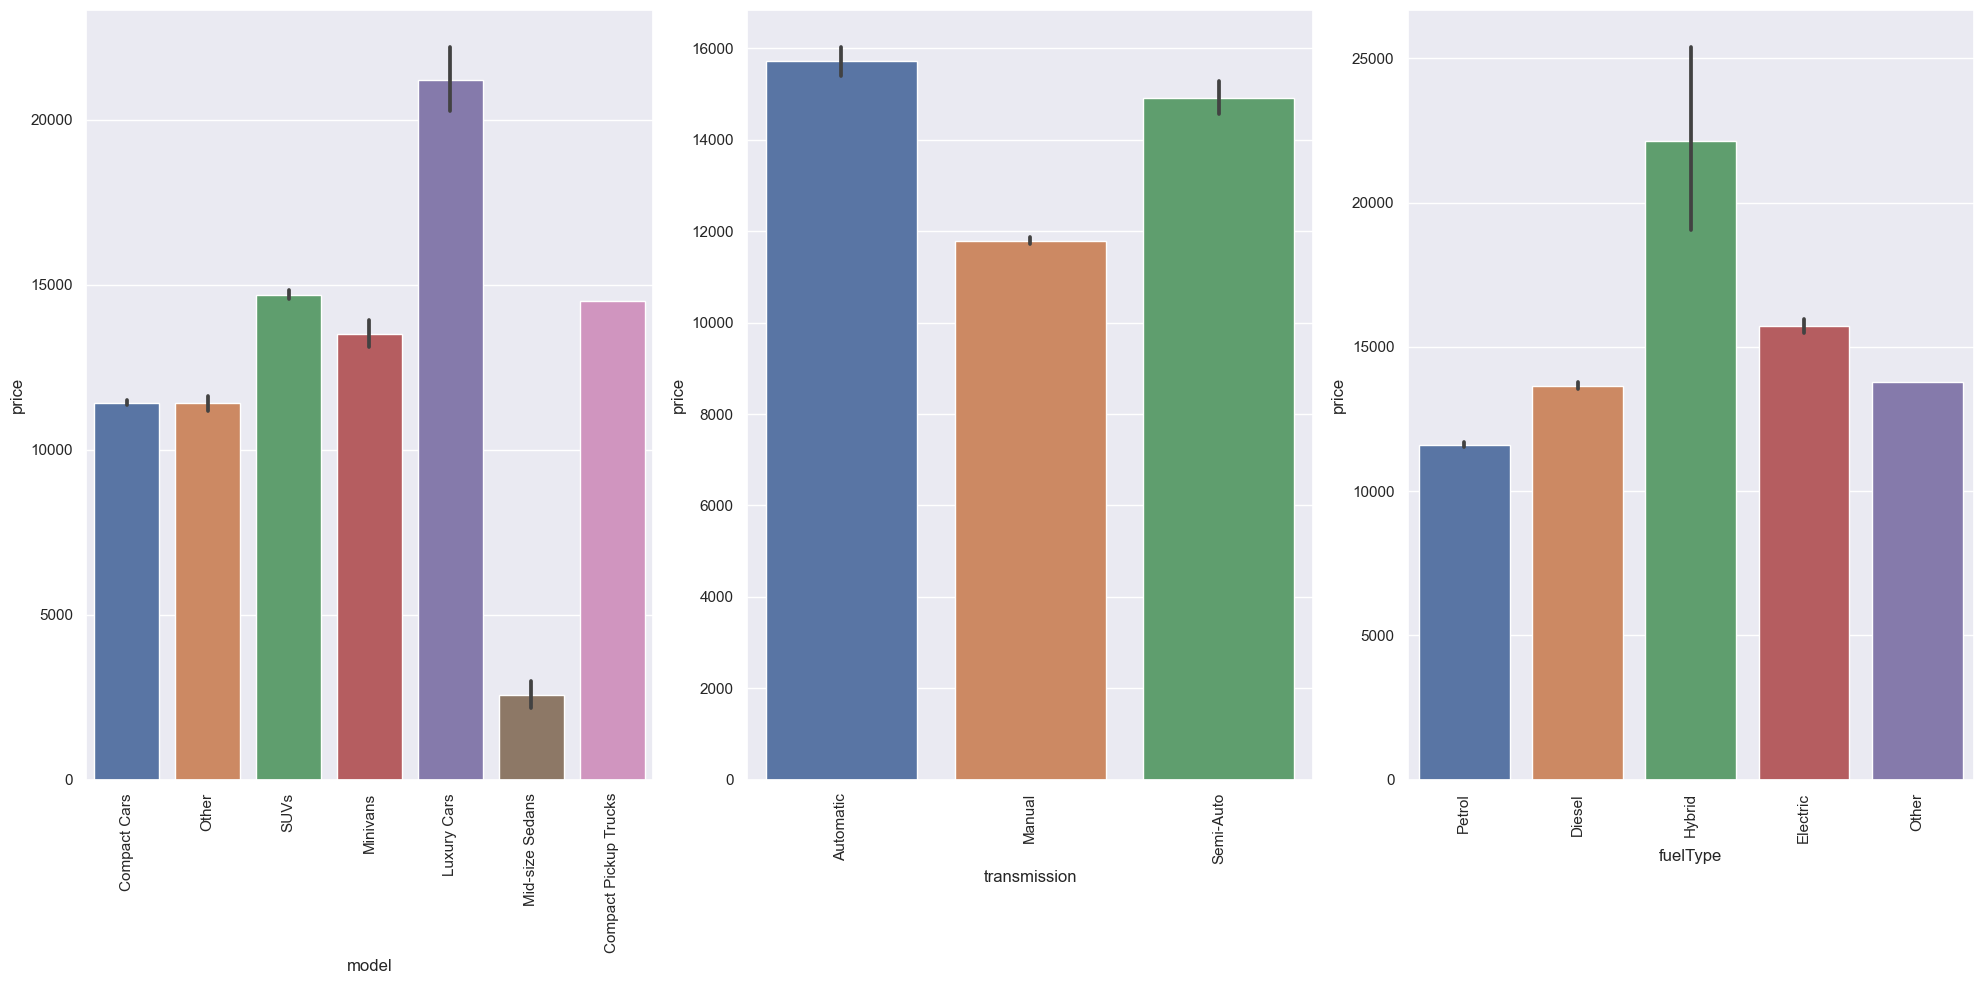

In [7]:
# list of categorical variables to plot
cat_vars = ['model', 'transmission', 'fuelType']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

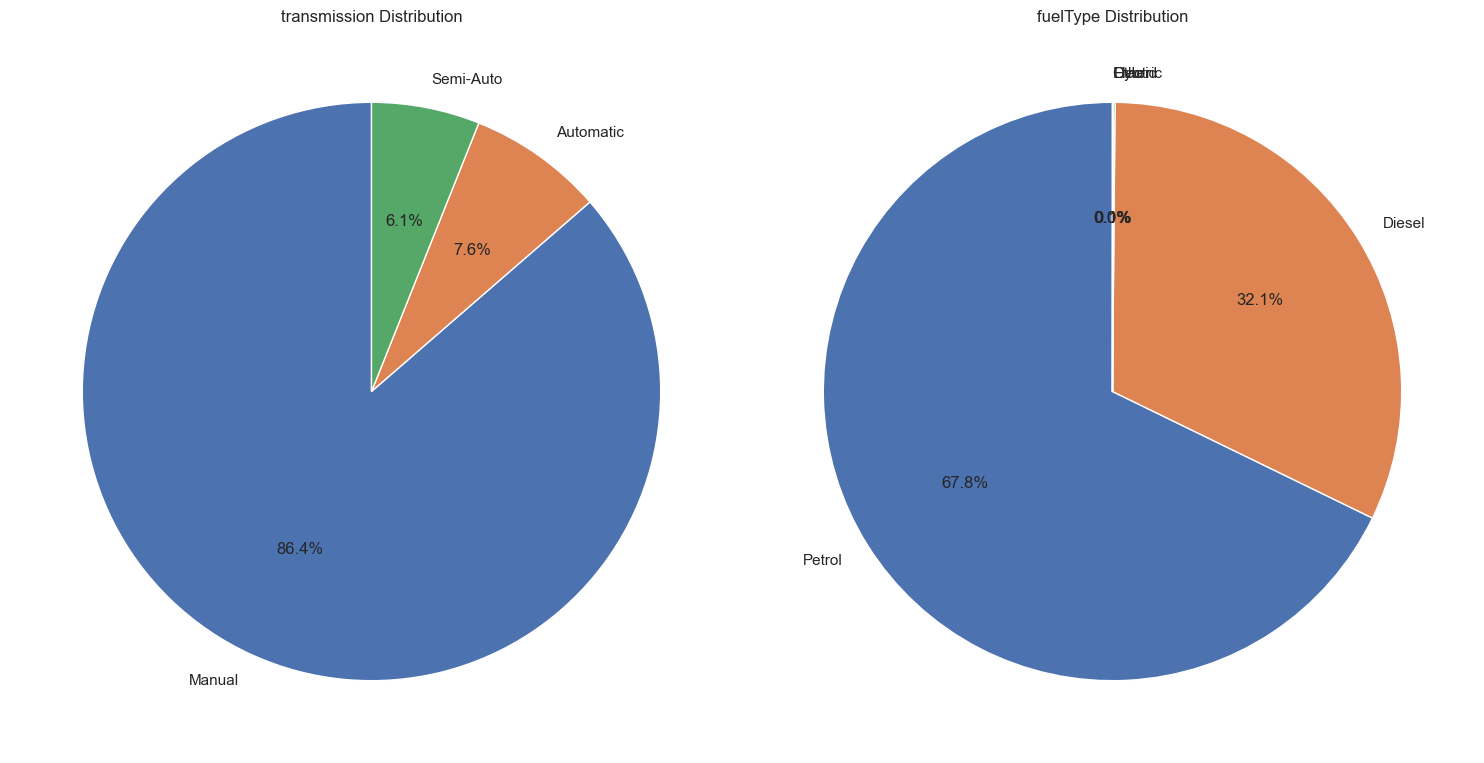

In [8]:
cat_vars = ['transmission', 'fuelType']

# create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

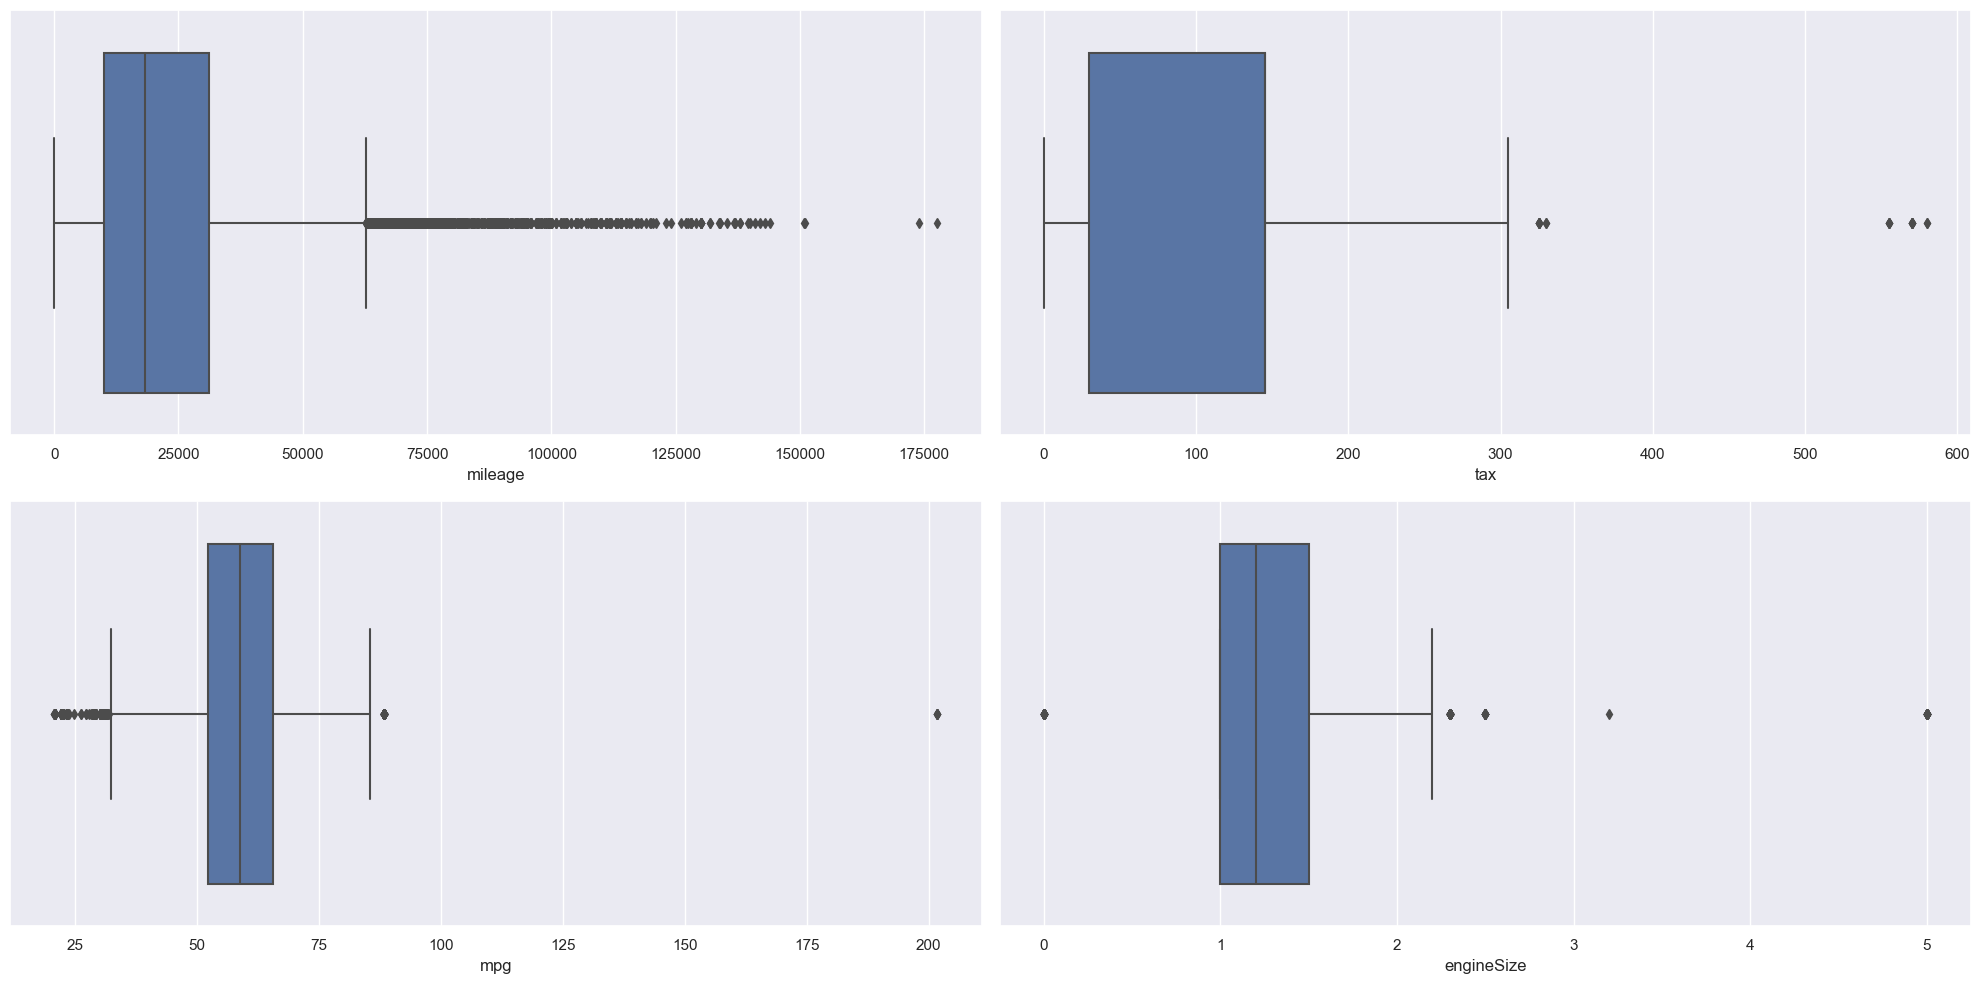

In [9]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

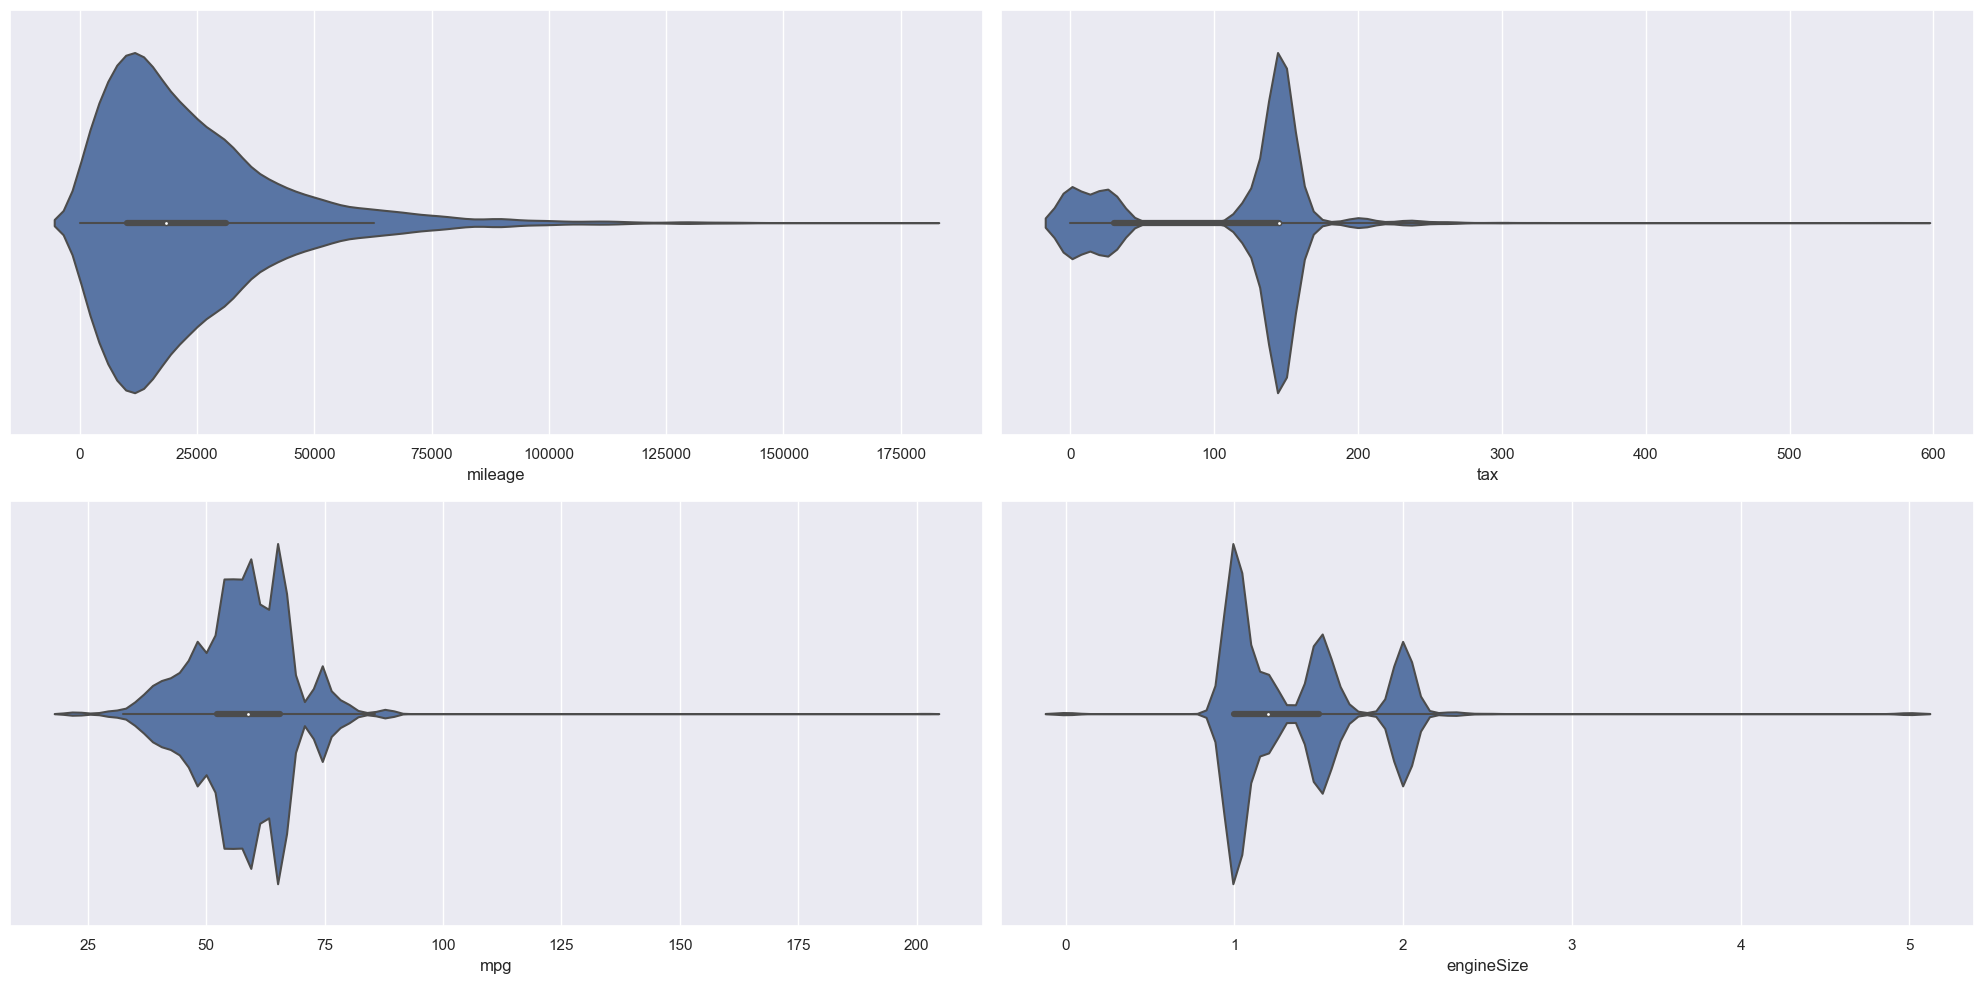

In [10]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

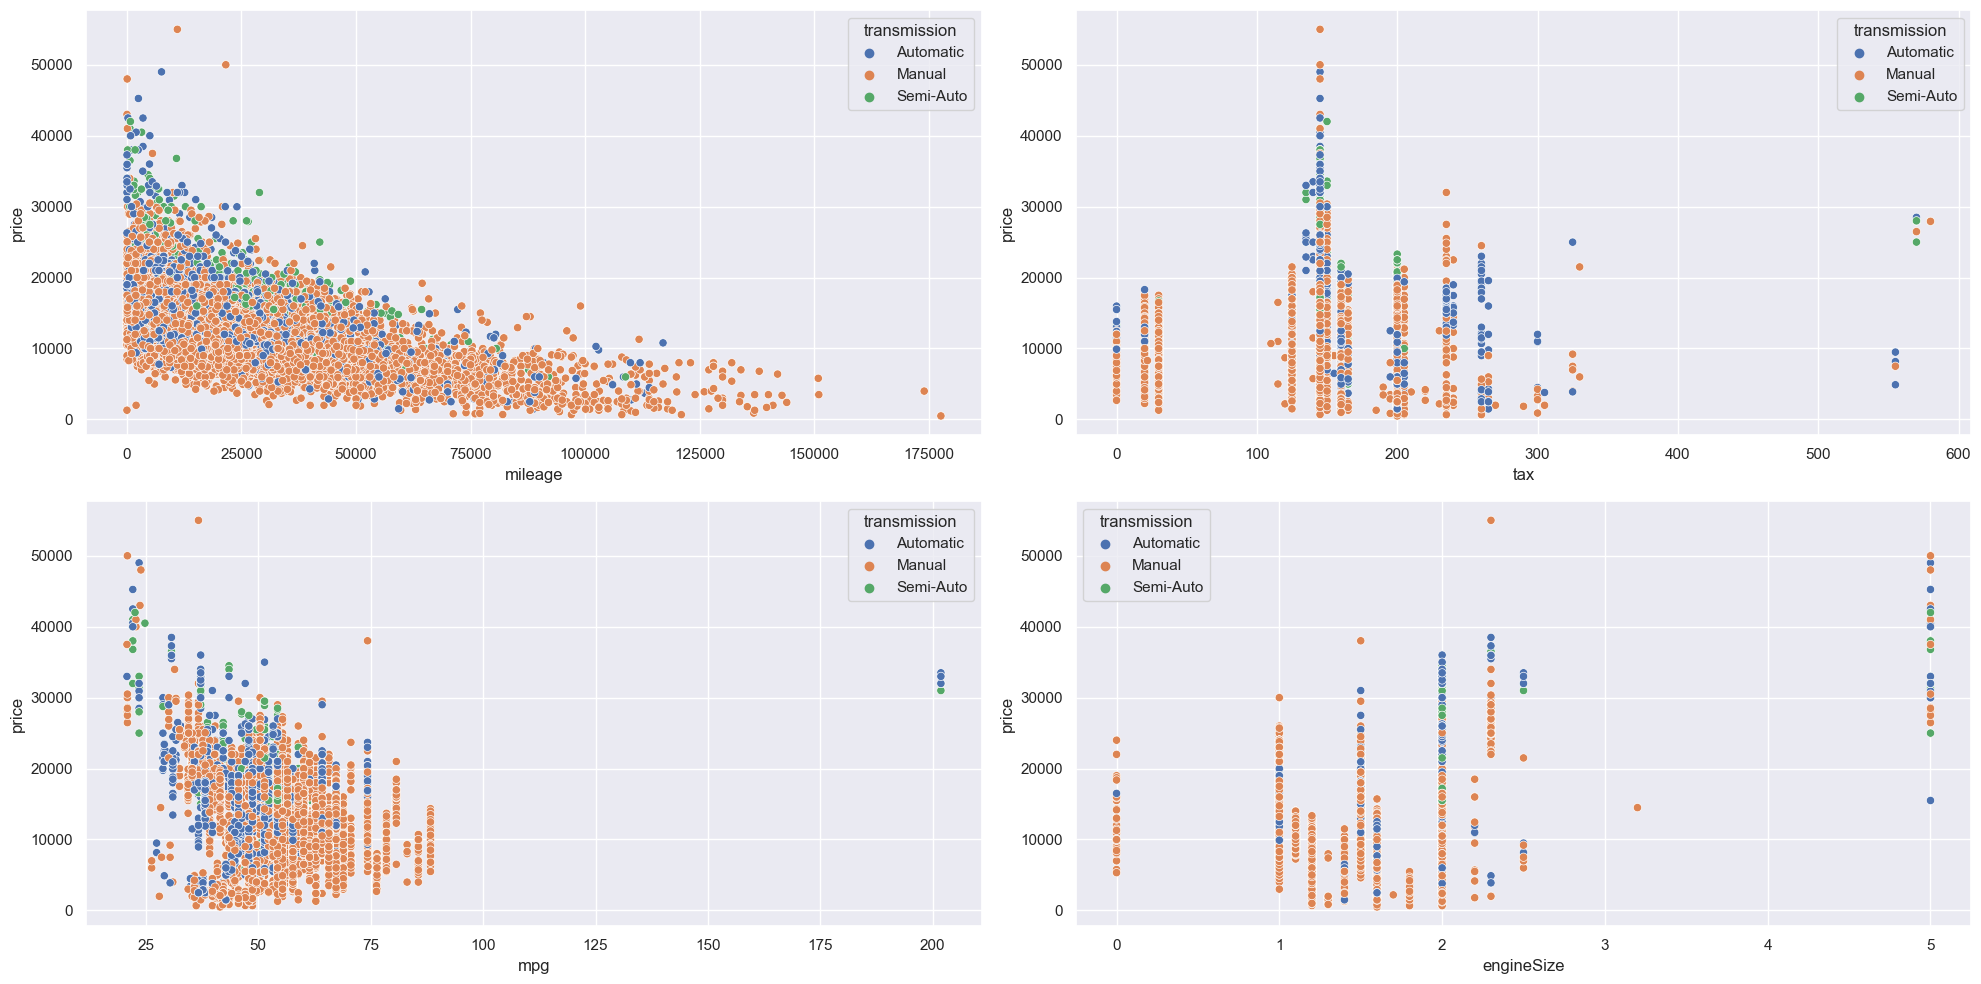

In [11]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='price', hue='transmission', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

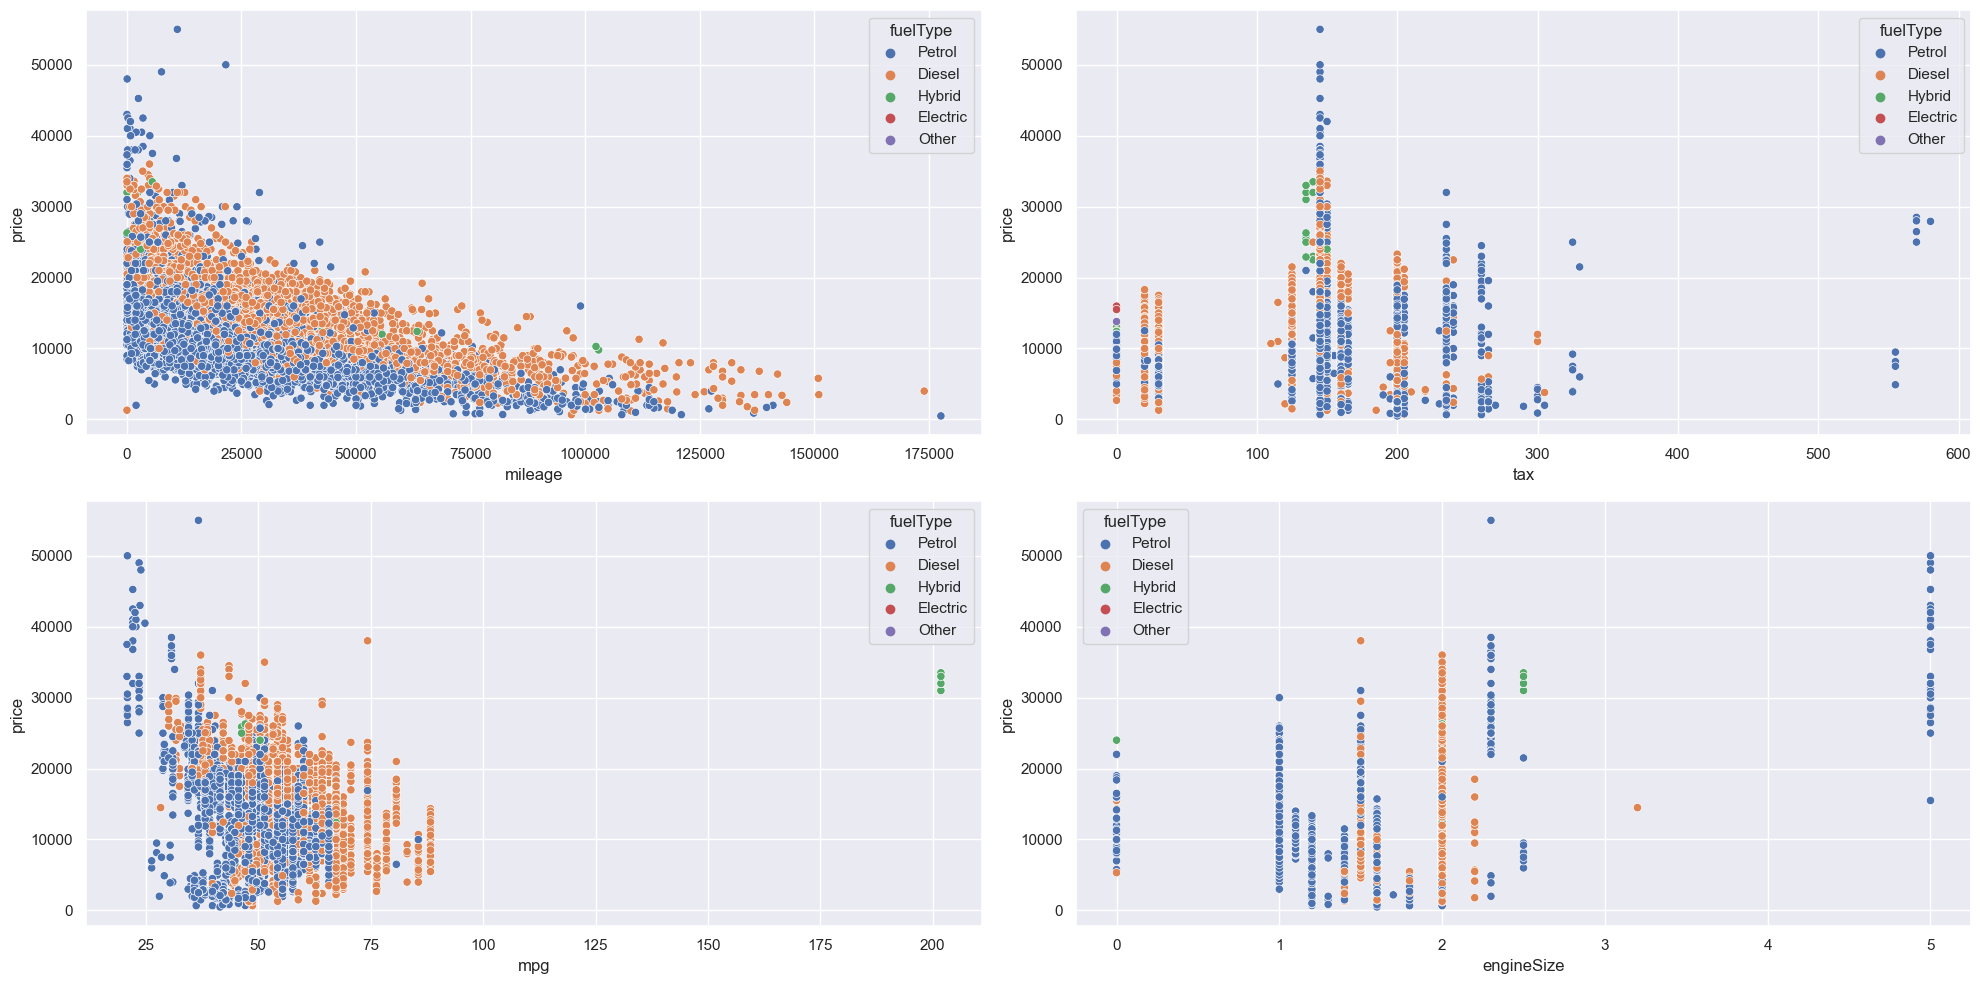

In [12]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='price', hue='fuelType', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

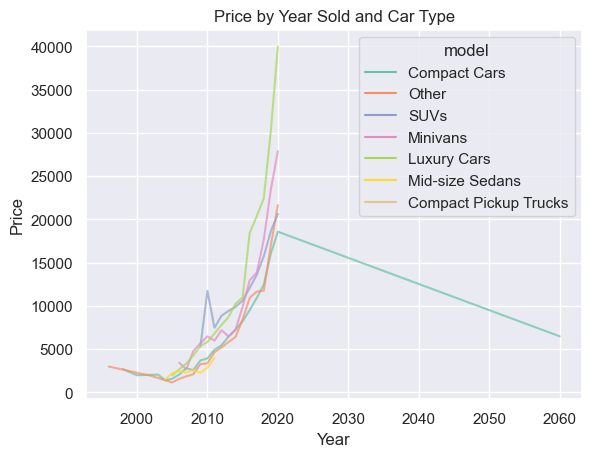

In [13]:
# We have to delete row where year > 2023
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='year', y='price', hue='model', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

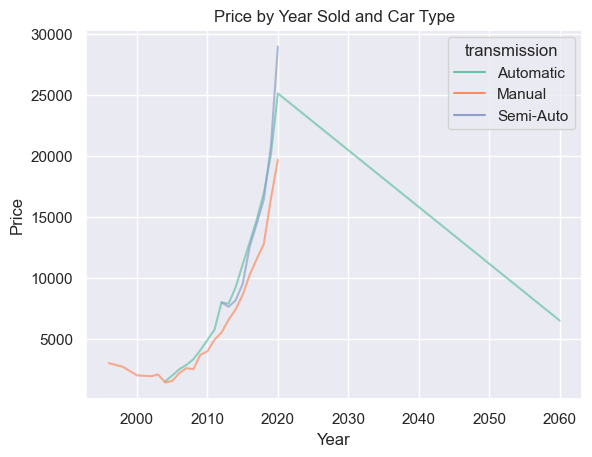

In [14]:
# We have to delete row where year > 2023
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='year', y='price', hue='transmission', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

# Data Preprocessing Part 2

In [15]:
df.shape

(17966, 9)

In [16]:
# Delete rows where "years" > 2023
df = df[df['year'] <= 2023]
df.shape

(17965, 9)

In [17]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding Object datatype

In [18]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

model: ['Compact Cars' 'Other' 'SUVs' 'Minivans' 'Luxury Cars' 'Mid-size Sedans'
 'Compact Pickup Trucks']
transmission: ['Automatic' 'Manual' 'Semi-Auto']
fuelType: ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [19]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

model: [0 5 6 4 2 3 1]
transmission: [0 1 2]
fuelType: [4 0 2 1 3]


# Correlation Heatmap

<AxesSubplot:>

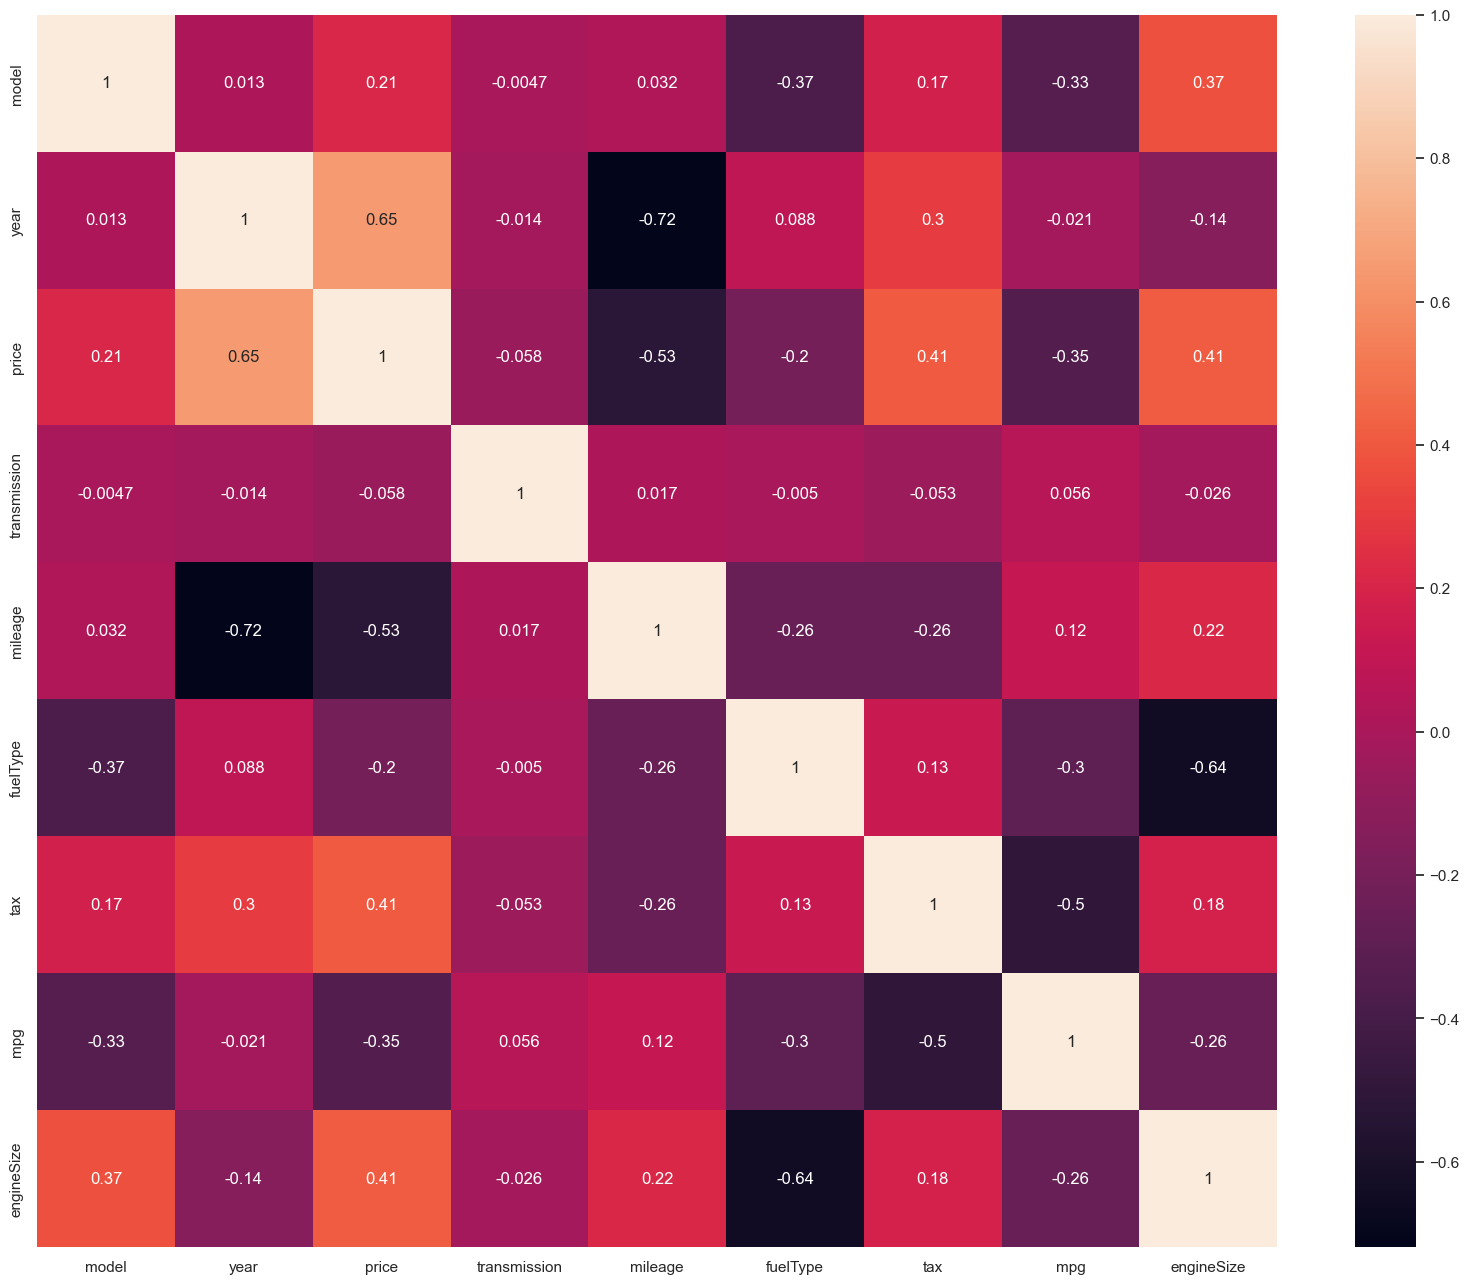

In [20]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train test Split

In [22]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)


# Outlier Removal using IQR

In [23]:
# Concatenate X_train and y_train for outlier removal
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the IQR values for each column
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from X_train
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate X_train and y_train after outlier removal
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

# Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6}


In [25]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split=6)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1259.4226750761627
MAPE is 0.13557836007948207
MSE is 3915820.674615265
R2 score is 0.8248329159813843
RMSE score is 1978.8432668140408


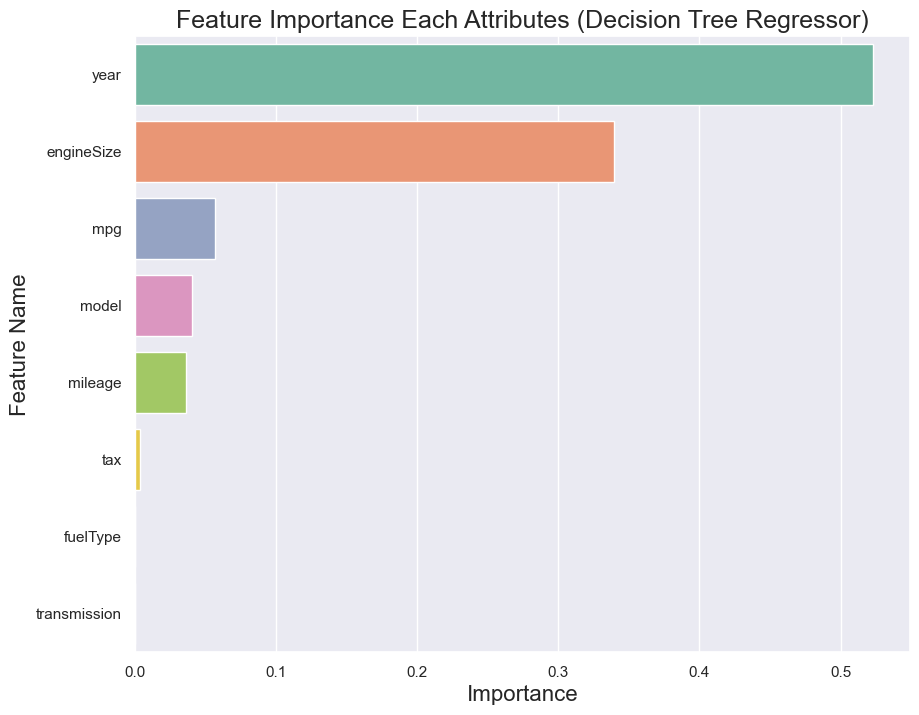

In [27]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

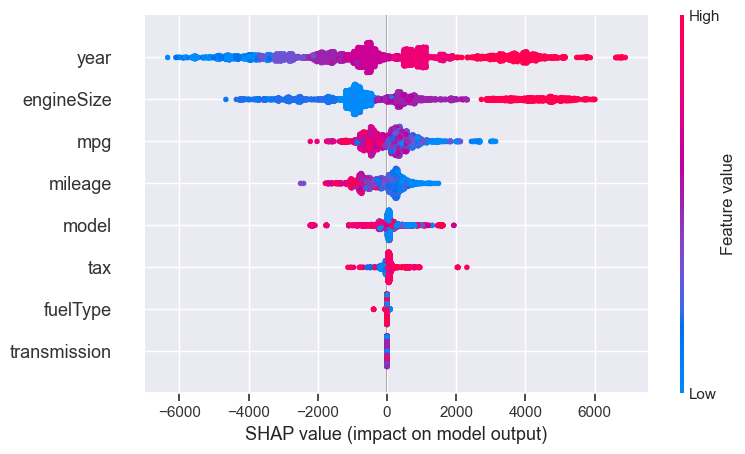

In [28]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

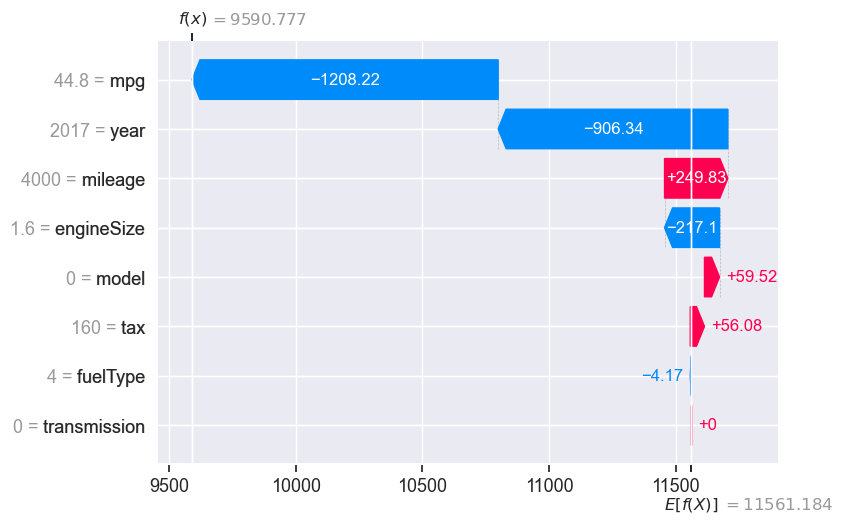

In [29]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=5, min_samples_leaf=1, 
                           max_features='auto')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_split=5, random_state=0)

In [33]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1143.0653454312364
MAPE is 0.12235562400514577
MSE is 3423755.4299044004
R2 score is 0.8468445557435594
RMSE score is 1850.3392742695596


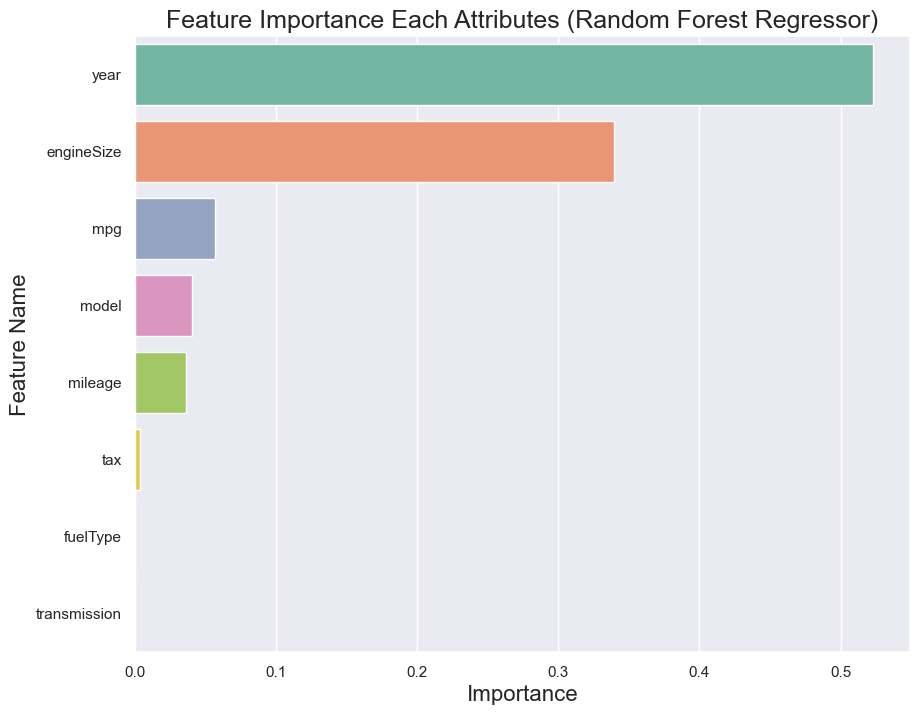

In [34]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

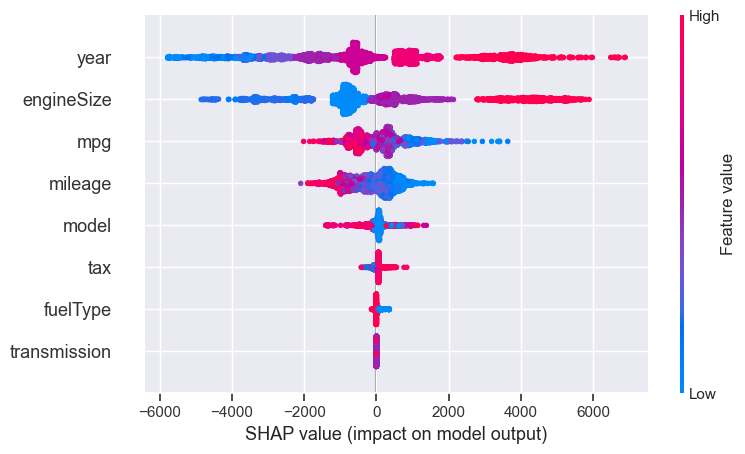

In [35]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

 99%|===================| 3543/3593 [00:34<00:00]        

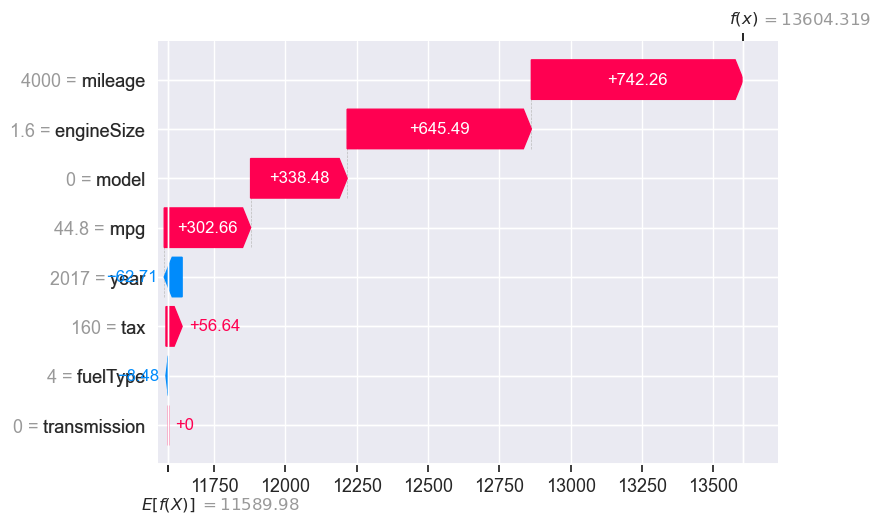

In [36]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])